Template for graph related processing and analysis

There are several packages in Python which are useful when analyzing graphs, igraph, etc. Although the NetworkX also has visualization function, Pyvis also provides amazing interactive visualization methods. In this template, I summarized some functions that are useful and frequently used.

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import random
import numpy as np 
import pandas as pd
import seaborn as sns

# Basics

If you have the network data ready (source-->destination, or source--destination), it's easy to create a directed or undirected graph as you want and saved the graph into a GML file. You can use a software called Graphia to open and visualize it. It works super well with large graph.

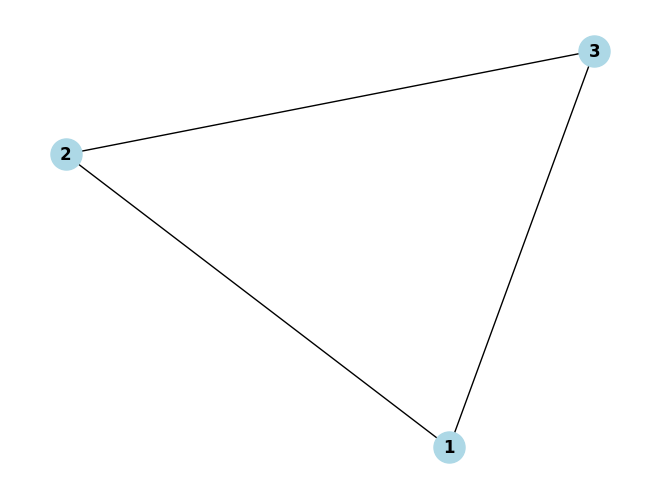

In [5]:
# Created an un directed graph
G = nx.Graph()

# Add the nodes to the graph
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges to connect the nodes
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)

# Alternative ways
#edges = [(1, 2), (2, 3), (3, 1)]
#G = nx.Graph(edges)

# Visualize the graph using a library like Matplotlib
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
plt.show()

In [ ]:
# Create a directed graph from customized dataset
G = nx.DiGraph()

# Add edges from DataFrame (use your customized dataset, here put pandas dataframe as an example)
for _, row in df_data.iterrows():
    source_node = row['source']
    dest_node = row['destination']
    G.add_edge(source_node, dest_node)

# Save the graph to a GML file(no need to run several times)
nx.write_gml(G, 'graph.gml')

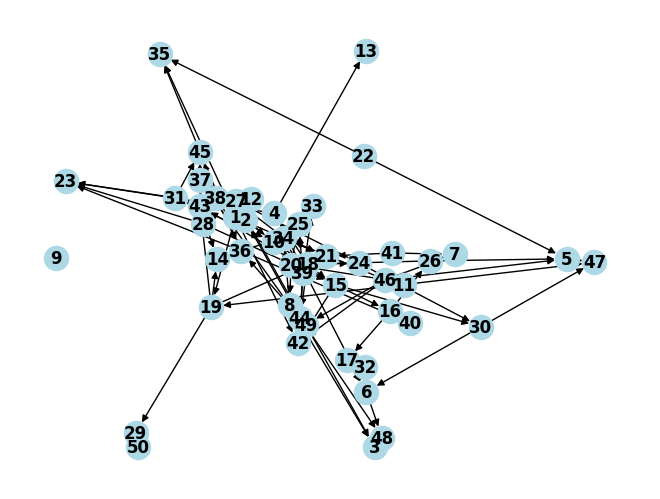

In [11]:
# Create an random directed graph
G = nx.DiGraph()

# Add 50 nodes
num_nodes = 50
G.add_nodes_from(range(1, num_nodes + 1))

# Define the number of edges you want
num_edges = 100  # You can adjust this as needed

# Add random directed edges
for _ in range(num_edges):
    source_node = random.randint(1, num_nodes)
    target_node = random.randint(1, num_nodes)
    if source_node != target_node and not G.has_edge(source_node, target_node):
        G.add_edge(source_node, target_node)

# Visualize the graph (optional)
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=300)
plt.show()


# Exploratory Data Analysis

In [ ]:
# Use Pyvis to create a html page to visualize the whole graph (Open the webpage and interact with the graph)
# Calculate node sizes based on the number of edges 
node_sizes = [len(list(G.successors(node))) for node in G.nodes()]

# Filter nodes with at least 1 edge
filtered_nodes = [node for node, size in zip(G.nodes(), node_sizes) if size > 0]

# Create a subgraph with filtered nodes
subgraph = G.subgraph(filtered_nodes)

# Calculate node sizes based on the number of edges (using pyvis)
node_sizes = [len(list(subgraph.successors(node))) for node in subgraph.nodes()]

# Create a pyvis Network with cdn_resources set to 'in_line'(set directed to False for undirected graph)
nt = Network(height="500px", width="100%", notebook=True, cdn_resources='in_line', directed=True)
nt.from_nx(subgraph)

# Set node sizes based on the calculated sizes
for idx, size in enumerate(node_sizes):
    nt.nodes[idx]['size'] = size * 5  # Adjust the scaling factor as needed

# Show the pyvis Network
nt.show("graph_pyvis.html")

Sometimes with large graph, it's difficult to visualize the entire graph, we may be interested also on largest strongly connected component or largest weakly connected graph.
Definition from Wikipedia:
-- In the mathematical theory of directed graphs, a graph is said to be strongly connected if every vertex is reachable from every other vertex. 
-- A "weakly connected component" refers to a subgraph of a directed graph in which every pair of nodes is connected by an undirected path.

In [ ]:
# Find the largest strongly connected component(For directed graph)
strongly_connected_components = list(nx.strongly_connected_components(G))
largest_strongly_connected = max(strongly_connected_components, key=len)
subgraph = G.subgraph(largest_strongly_connected)

# Calculate node sizes based on the number of edges
node_sizes = {node: subgraph.in_degree(node) + subgraph.out_degree(node) for node in subgraph.nodes()}

# Create a pyvis Network(set directed to False for undirected graph)
nt = Network(height="1000px", width="100%", notebook=True, directed=True)

# Add nodes and edges to the pyvis Network
for node in subgraph.nodes():
    nt.add_node(node, size=node_sizes[node] * 5)  # Adjust the scaling factor as needed

for edge in subgraph.edges():
    nt.add_edge(edge[0], edge[1], arrowStrikethrough=False)

# Show the pyvis Network
nt.show("largest_strongly_connected_pyvis.html")

In [ ]:
# Find the largest weakly connected component
largest_weakly_connected = max(nx.weakly_connected_components(G), key=len)
subgraph = G.subgraph(largest_weakly_connected)

# Calculate node sizes based on the number of dependent degrees
dependent_degrees = {}
for node in subgraph.nodes():
    successors = nx.descendants(subgraph, node)
    dependent_degrees[node] = len(successors) + subgraph.out_degree(node)

# Create a pyvis Network(set directed to False for undirected graph)
nt = Network(height="1000px", width="100%", notebook=True, directed=True)

# Add nodes and edges to the pyvis Network
for node in subgraph.nodes():
    nt.add_node(node, size=dependent_degrees[node])  # Adjust the scaling factor as needed

for edge in subgraph.edges():
    nt.add_edge(edge[0], edge[1], arrowStrikethrough=False)

# Show the pyvis Network
nt.show("largest_weakly_connected_pyvis.html")

In [14]:
# No of Unique nodes 
print("The number of unique persons",len(G.nodes()))

The number of unique persons 50


In [ ]:
# For undirected graph
print(nx.is_connected(G))

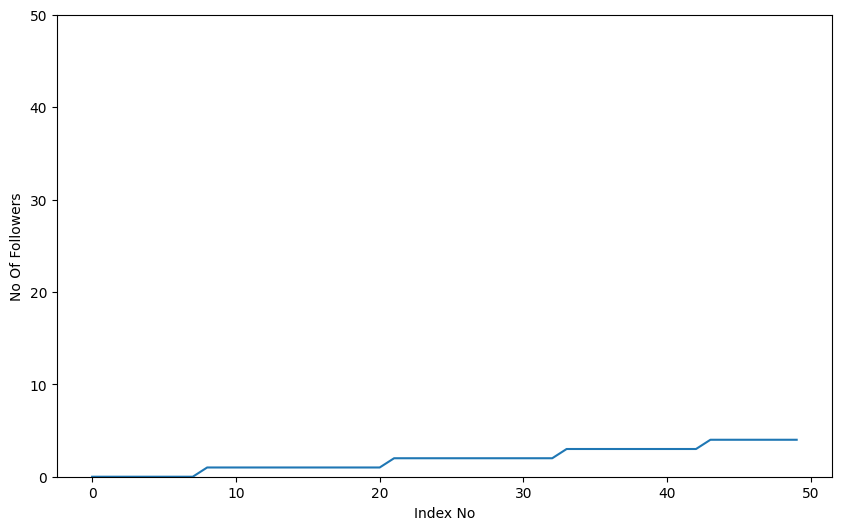

In [13]:
# No of followers for each node
indegree_dist = list(dict(G.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.ylim(0,50)
plt.show()

Here is not a typical social network as we randomly generated one, a typical network would show exponential trend for followers.

In [17]:
def find_node_with_most_edges(G):
    # initialize a variable to store the node with the most edges
    max_node = None

    # iterate through all the nodes in the graph
    for node in G.nodes():
        # count the number of edges connected to the node
        num_edges = len(list(G.edges(node)))
        # update the max_node variable if the current node has more edges than the previous max_node
        if max_node is None or num_edges > len(list(G.edges(max_node))):
            max_node = node

    # return the node with the most edges
    return max_node

# find the node with the most edges
max_node = find_node_with_most_edges(G)
print("The node of super star",max_node)

The node of super star 46


In [19]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 4.0
91 percentile value is 4.0
92 percentile value is 4.0
93 percentile value is 4.0
94 percentile value is 4.0
95 percentile value is 4.0
96 percentile value is 4.0
97 percentile value is 4.0
98 percentile value is 4.0
99 percentile value is 4.0
100 percentile value is 4.0


C:\Users\x.hong\AppData\Local\Temp\ipykernel_1140\4097890738.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(indegree_dist, color='#16A085')


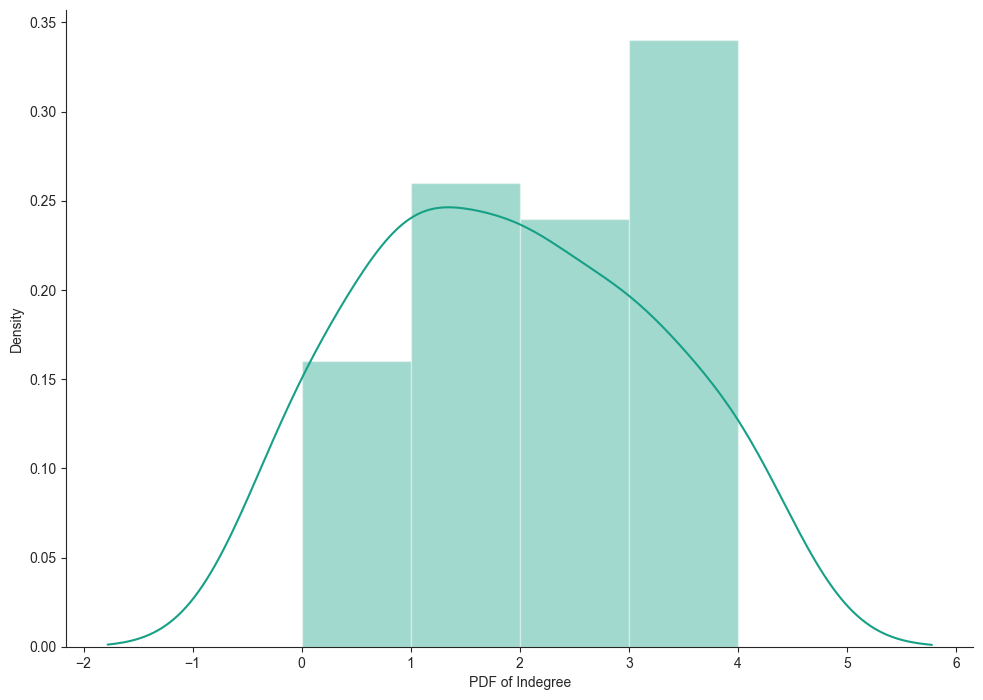

In [20]:
# PDF of in degrees
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

Similar if you want to analyze the in degree infos

In [ ]:
# Define the function to plot the heatmap
def plot_heatmap(df):
    # Correlation heatmap(prettier, show only half of the graph)
    # Change the style theme
    sns.set(style = "white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype = bool))

    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize = (11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap = True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5}); 

# Useful features in practice

# Topological features

In [ ]:
# Calculate the number of edges for each node(important source nodes)
node_degrees = G.out_degree()

# Sort nodes by their degrees in descending order
sorted_nodes = sorted(node_degrees, key=lambda x: x[1], reverse=True)

sorted_nodes[:20]

In [ ]:
# Calculate the number of edges for each node(important target nodes)
node_degrees_in = G.in_degree()

# Sort nodes by their degrees in descending order
sorted_nodes_in = sorted(node_degrees_in, key=lambda x: x[1], reverse=True)

sorted_nodes_in[:20]

In [23]:
# Degree Centrality measure
deg_centrality = nx.degree_centrality(G)

# Betweeness centrality measure(It takes time to run this line)
betweeness_centrality = nx.betweenness_centrality(G)

# Extra clustering index
G.remove_edges_from(nx.selfloop_edges(G)) # Remove self-loop
clusterings = nx.clustering(G)

# Core numbers 
core_numbers = nx.core_number(G)

from networkx.algorithms.link_analysis import pagerank
# Compute the personalized PageRank scores
pageranks = pagerank(G, alpha=0.5)

In [ ]:
# Define the function to count the degrees and neighbors
def neighbor_count(graph, v):
    neighbors_in = list(graph.predecessors(v))
    neighbors_out = list(graph.successors(v))
    neighbors = list(set(neighbors_in).union(neighbors_out))
   
    return graph.in_degree(v), graph.out_degree(v), neighbors_in, neighbors_out, neighbors

In [ ]:
# Defint the function to generate topological features
def topological_features(graph,diG, datasets, deg_centrality, betweeness_centrality, pageranks, clusterings, core_numbers): 
    """
    Creates a feature vector for each edge of the graph contained in dataset
    """
    feature_vector = [] 

    # iterate over the rows of the DataFrame
    for i, row in tqdm(datasets.iterrows()):
        source_node, target_node = row[0], row[1]

        # Degree Centrality
        source_degree_centrality = deg_centrality[source_node]
        target_degree_centrality = deg_centrality[target_node]
        
        # Betweeness centrality  
        diff_bt = betweeness_centrality[source_node] - betweeness_centrality[target_node]

        # Similarity
        # Preferential Attachement 
        pref_attach = list(nx.preferential_attachment(graph, [(source_node, target_node)]))[0][2]

        # AdamicAdar
        if source_node == target_node:
            aai = 0
        else: 
            aai = list(nx.adamic_adar_index(graph, [(source_node, target_node)]))[0][2]

        # Jaccard
        jacard_coeff = list(nx.jaccard_coefficient(graph, [(source_node, target_node)]))[0][2]

        # Degree and common neighbor features
        indegree_source, outdegree_source, neighbor_in_s, neighbor_out_s, all_neighbor_s = neighbor_count(diG, source_node)
        indegree_target, outdegree_target, neighbor_in_t, neighbor_out_t, all_neighbor_t = neighbor_count(diG, target_node)
        
        # Common Neighbors
        common_in = len(set(neighbor_in_s).intersection(neighbor_in_t))
        common_out = len(set(neighbor_out_t).intersection(neighbor_out_s))

        # Cluster feature
        core_number_s = core_numbers[source_node]
        core_number_t = core_numbers[source_node]
        cluster_s = clusterings[source_node]
        cluster_t = clusterings[target_node]

        page_rank = pageranks[target_node]
        
        # Create graph feature vector with all feature computed above
        feature_vector.append([source_degree_centrality, target_degree_centrality, 
                               diff_bt, pref_attach, aai, jacard_coeff,
                               common_in, common_out, indegree_source, outdegree_source,
                               indegree_target, outdegree_target, core_number_s, core_number_t,
                               cluster_s, cluster_t, page_rank])                     
    return feature_vector

## Deepwalk features

Deepwalk features overfit a lot when I used it, but could be useful too

In [ ]:
# Generate residual graph
def generate_samples(graph, train_set_ratio):
    """
    Graph pre-processing step required to perform supervised link prediction
    Create training and test sets
    """
        
    # --- Step 0: The graph must be connected ---
    if nx.is_connected(G) is not True:
        raise ValueError("The graph contains more than one connected component!")
       
    
    # --- Step 1: Generate positive edge samples for testing set ---
    residual_g = graph.copy()
    test_pos_samples = []
      
    # Store the shuffled list of current edges of the graph
    edges = list(residual_g.edges())
    np.random.shuffle(edges)
    
    # Define number of positive test samples desired
    test_set_size = int((1.0 - train_set_ratio) * graph.number_of_edges())
    train_set_size = graph.number_of_edges() - test_set_size
    num_of_pos_test_samples = 0
    
    # Remove random edges from the graph, leaving it connected
    # Fill in the blanks
    for edge in edges:
        
        # Remove the edge
        residual_g.remove_edge(edge[0], edge[1])
        
        # Add the removed edge to the positive sample list if the network is still connected
        if nx.is_connected(residual_g):
            num_of_pos_test_samples += 1
            test_pos_samples.append(edge)
        # Otherwise, re-add the edge to the network
        else: 
            residual_g.add_edge(edge[0], edge[1])
        
        # If we have collected enough number of edges for testing set, we can terminate the loop
        if num_of_pos_test_samples == test_set_size:
            break
    
    # Check if we have the desired number of positive samples for testing set 
    if num_of_pos_test_samples != test_set_size:
        raise ValueError("Enough positive edge samples could not be found!")

        
    # --- Step 2: Generate positive edge samples for training set ---
    # The remaining edges are simply considered for positive samples of the training set
    train_pos_samples = list(residual_g.edges())
        
        
    # --- Step 3: Generate the negative samples for testing and training sets ---
    # Fill in the blanks
    non_edges = list(nx.non_edges(graph))
    np.random.shuffle(non_edges)
    
    train_neg_samples = non_edges[:train_set_size] 
    test_neg_samples = non_edges[train_set_size:train_set_size + test_set_size]

    
    # --- Step 4: Combine sample lists and create corresponding labels ---
    # For training set
    train_samples = train_pos_samples + train_neg_samples
    train_labels = [1 for _ in train_pos_samples] + [0 for _ in train_neg_samples]
    # For testing set
    test_samples = test_pos_samples + test_neg_samples
    test_labels = [1 for _ in test_pos_samples] + [0 for _ in test_neg_samples]
    
    return residual_g, train_samples, train_labels, test_samples, test_labels


In [ ]:
def generate_random_walk(graph, root, L):
    """
    :param graph: networkx graph
    :param root: the node where the random walk starts
    :param L: the length of the walk
    :return walk: list of the nodes visited by the random walk
    """
    walk = [root]
    while len(walk) < L:
        current_node = walk[-1]
        candidates = list(nx.neighbors(graph, current_node))
        next = np.random.choice(candidates)
        walk.append(next) 

    return [str(i) for i in walk] # convert to string

In [ ]:
from tqdm import tqdm
def deep_walk(graph, N, L):
    '''
    :param graph: networkx graph
    :param N: the number of walks for each node
    :param L: the walk length
    :return walks: the list of walks
    '''
    walks = []
    np.random.seed(4) # fix random seed to obtain same random shuffling when repeating experiment
    nodes = list(G.nodes)

    for _ in tqdm(range(N)):
        np.random.shuffle(nodes) # shuffle the ordering of nodes, it helps speed up the convergence of stochastic gradient descent
        for node in nodes:
            # generate a random walk from the current visited node
            walk = generate_random_walk(graph, node, L)
            walks.append(walk)              
    return walks

In [ ]:
# Construct the training and testing sets
residual_g, train_samples, train_labels, test_samples, test_labels = generate_samples(graph=G, train_set_ratio=0.8)

In [ ]:
# Perform random walks over the residual network
num_of_walks, walk_length, window_size, embedding_size = (500, 10, 5, 8)# 32 is prone to overfitting
residual_walks = deep_walk(graph=residual_g, N=num_of_walks, L=walk_length)
# Learn representations of nodes
model_walk = Word2Vec(residual_walks, size=embedding_size, sg=1, window=window_size, min_count=0, workers=3, hs=1, iter=1, negative=0)

In [ ]:
node2embedding = model_walk.wv
train_samples = list(np.array(X_train))
test_samples = list(np.array(test_data))
# --- Construct feature vectors for edges ---
feature_func = lambda x,y: abs(x-y)
# Deepwalk feature
train_features_walk = [feature_func(node2embedding[str(edge[0])], node2embedding[str(edge[1])]) for edge in train_samples]
test_features_walk = [feature_func(node2embedding[str(edge[0])], node2embedding[str(edge[1])]) for edge in test_samples]